# 05 - Data visualization with matplotlib and seaborn


This notebook will show you:
- []
- []
- []

For this tutorial we are going to use the Wine dataset:

In [73]:
from sklearn.datasets import load_wine

wine_dataset = load_wine(as_frame=True)
dataset = wine_dataset["frame"]

In [79]:
wine_dataset["target_names"]

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [74]:
print(wine_dataset['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

# Matplotlib

(Explain the logic behind Matplotlib)
    
## Figure and axes
- The Figure is the final image, which can contain more than one subfigures (refered to as plots or Axes).
- Axes are individual plots contained inside a Figure.
    - They are not the "axis" of a figure!

- The command `plt.subplots` allows you to create a Figure and specify the number of Axes inside.

The following command creates a Figure with a single Axes:

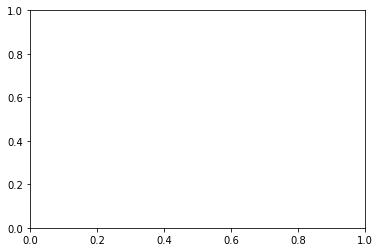

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

In [4]:
print(fig)
print(ax)

Figure(432x288)
AxesSubplot(0.125,0.125;0.775x0.755)


We can also create a Figure with mutliple Axes, and define how these should spread across rows (using parameter `nrows`) and columns (using parameter `ncols`). We can also specify the size of our figure in inches, using the parameter `figsize`: 

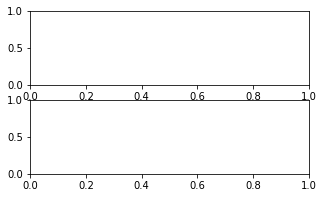

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5, 3))

If we have two axes, what does `ax` represent now?

In [15]:
print(ax)

[<AxesSubplot:> <AxesSubplot:>]


It is an array of two Axes. This means we can also separate our subplots in the following manner:

`fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1)`.

### Exercise
How would you create a Figure with 2 Axes, one per column?

#### Answer

In [30]:
#fig, ax = plt.subplots(nrows=1, ncols=2)

## Other components of a matplotlib plot

{TO-DO: paste picture of a plot components}

## Inspecting the dataset

Let's now create a plot using our loaded dataset. 

One common data visualization step during machine learning analysis is to visually inspect the correlation between the features and the predictor, or between the features themselves.

### Feature correlation

Let's plot the correlation between two of the values of two of the features of the dataset, alcohol and malic acid. 

As you can see looking at the following code, various methods of Axes can help us customize our plot. For example, we can use `set_xlabel` to determine the label in the x-axis, or `set_title` to add a title to the figure.

No handles with labels found to put in legend.


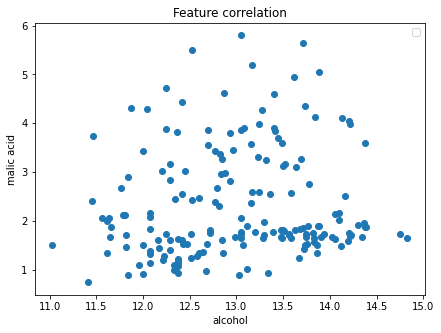

In [66]:
alcohol = dataset["alcohol"]
malic_acid = dataset["malic_acid"]

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(alcohol, malic_acid)
ax.set_xlabel("alcohol")
ax.set_ylabel("malic acid")
ax.set_title("Feature correlation")
ax.legend()
#ax.legend(dataset["frame"]["target"].values)
plt.show()

### Exercise

We can customize our plot in many different ways. Read the documentation of `scatter` [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) and change the plot above so that observations are now plotted in green instead of blue.

#### Answer

### Name??

- Say we can also explore the relationship between the predicted class and each feature. But the predicted classes are labels, so using the same plot as above wouldn't be the best option. One possibility is to use boxplots.
- Describe boxplots

- You can read the documentation of `boxplot` [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)
- `boxplot` takes as input separate arrays with the values for each class

In [67]:
alcohol_by_class = [
    dataset.loc[dataset["target"]==c]["alcohol"].values for c in set(dataset["target"])
]

Let's plot the data:

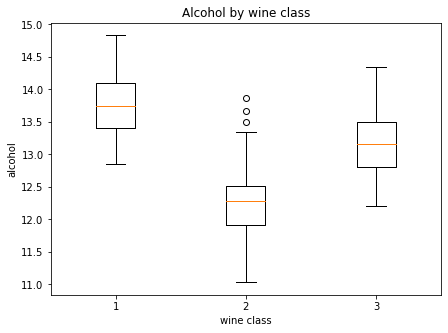

In [63]:
fig, ax = plt.subplots(figsize=(7,5))
ax.boxplot(alcohol_by_class)
ax.set_xlabel("wine class")
ax.set_ylabel("alcohol")
ax.set_title("Alcohol by wine class")
plt.show()

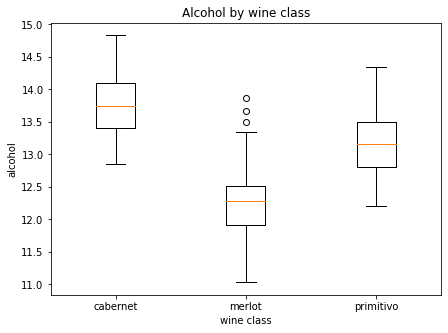

In [83]:
classes_names = ["cabernet", "merlot", "primitivo"]

fig, ax = plt.subplots(figsize=(7,5))
ax.boxplot(alcohol_by_class)

ax.set_xticklabels(classes_names)

ax.set_xlabel("wine class")
ax.set_ylabel("alcohol")
ax.set_title("Alcohol by wine class")
plt.show()

# Seaborn

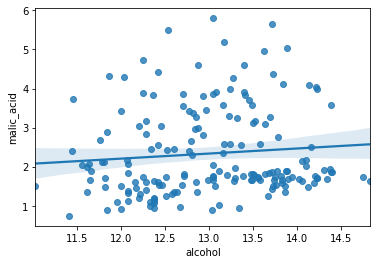

In [33]:
import seaborn as sns

sns.regplot(x=alcohol, y=malic_acid)
plt.show()

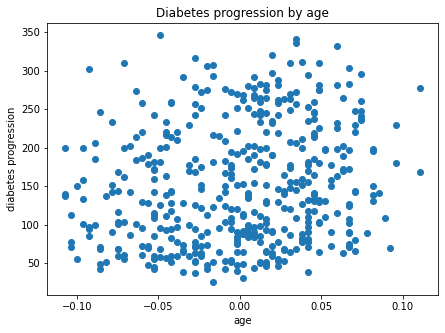

In [16]:
age = dataset["frame"]["age"]
diabetes_prog = dataset["frame"]["target"]

fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(age, diabetes_prog)
ax.set_xlabel("age")
ax.set_ylabel("diabetes progression")
ax.set_title("Diabetes progression by age")
plt.show()

Let's now plot how all features correlate with the predictor in a single plot.

To do this, we need to ..

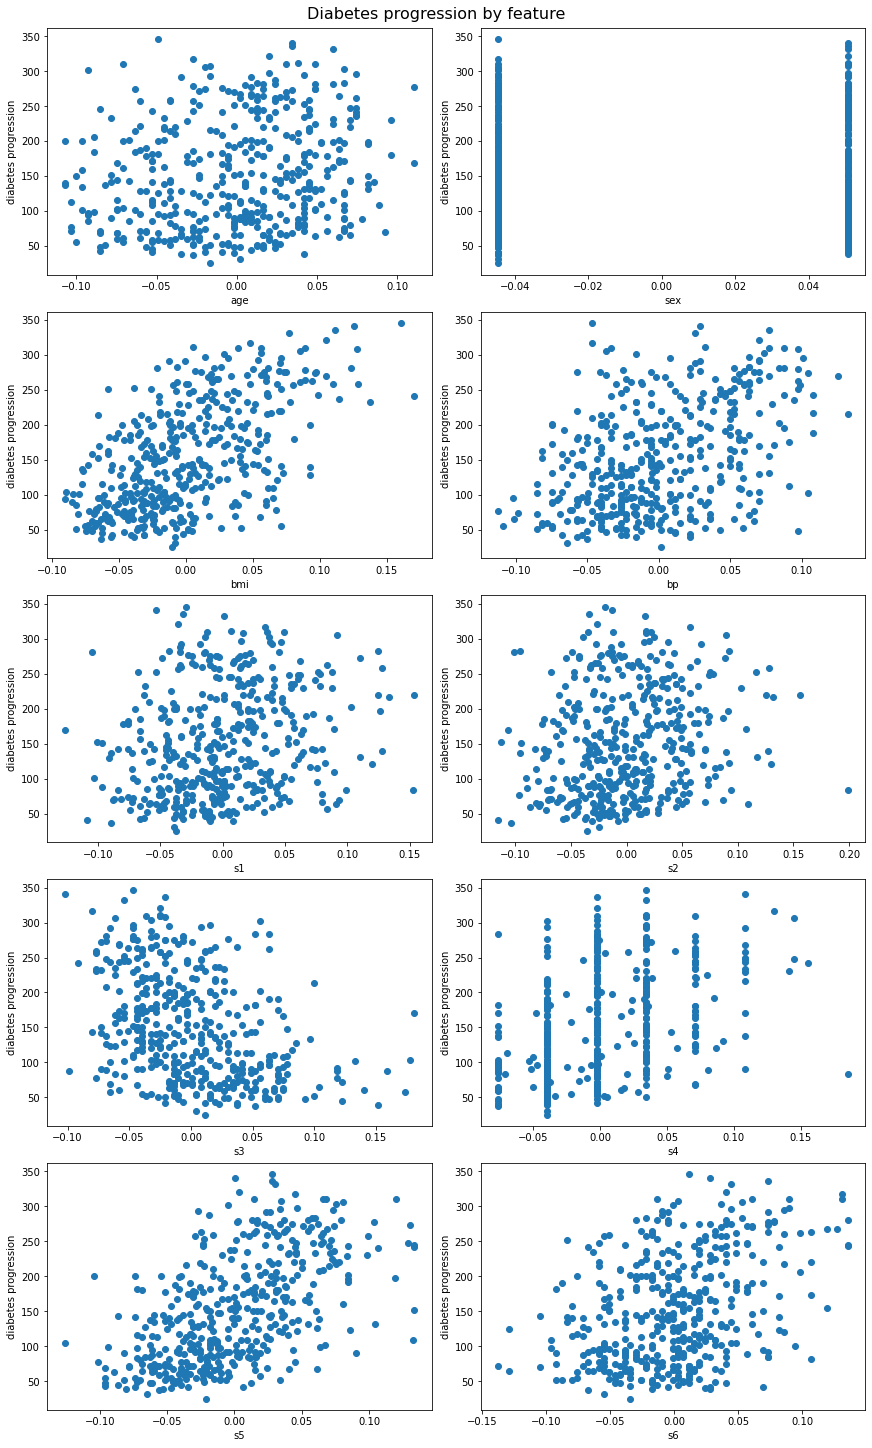

In [13]:
nrows = 5
ncols = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(12,20), constrained_layout=True)
fig.suptitle("Diabetes progression by feature", fontsize=16)

for idx, ax in enumerate(axes.flatten()):
    predictor = dataset['frame'].iloc[:, idx]
    ax.scatter(predictor, dataset['frame']['target'])
    ax.set_xlabel(f"{predictor.name}")
    ax.set_ylabel("diabetes progression")

plt.show()

In [42]:
dataset_sex = dataset["frame"][["sex", "target"]]
dataset_sex = dataset_sex.set_index("sex")
dataset_sex = dataset_sex.rename(index={"0.050680": "0", 0.050680: "1"})
dataset_sex

,target
sex,
0.050680,151.0
-0.044642,75.0
0.050680,141.0
-0.044642,206.0
-0.044642,135.0
...,...
0.050680,178.0
0.050680,104.0
0.050680,132.0


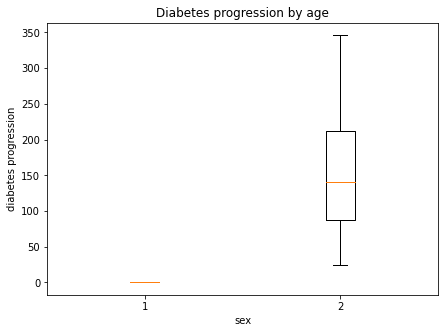

In [19]:
# fig, ax = plt.subplots(figsize=(7,5))
# ax.boxplot([dataset["frame"]["sex"], dataset["frame"]["target"]])
# ax.set_xlabel("sex")
# ax.set_ylabel("diabetes progression")
# ax.set_title("Diabetes progression by age")
# plt.show()

## Other plots with matplotlib:

- Inspect the categorical predictors of the dataset
- Visualize linear regression model

# Seaborn

- Seaborn is built on top of matplotlib
- Show how to prepare your data and create some basic plots using seaborn

# Check your knowledge

{TO-DO}

Load the dataset pre-processed in notebook 1 {give name}, and:

1. 
2. 
3. 

Answer the following questions:

1. 
2.
3.

# Additional resources
- [Data Visualization in Python _by Kirstie Whitaker_](https://www.youtube.com/watch?v=uaKu5a6P3oU)
- [Matplotlib cheatsheet](https://github.com/matplotlib/cheatsheets/blob/master/cheatsheets-1.png)
- [The lifecycle of a plot](https://matplotlib.org/stable/tutorials/introductory/lifecycle.html): Official matplotlib guide to creating a plot.